In [1]:
import pandas as pd
import seaborn as sns
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
CO_dataset = pd.read_csv('../DataBases/crude_oil.csv')
CO_dataset.rename(columns={' Value': 'value' },inplace=True)
CO_dataset.dropna(inplace=True)
Crude_Series = CO_dataset.value.values



In [3]:
Crude_Series.min()

11.258

FUNÇÃO DE AGRUPAMENTO DE DADOS


In [5]:
def group(dataset:pd.DataFrame, period: str = 'm')-> pd.DataFrame:
    dataset.Date = pd.to_datetime(dataset.Date)
    Year = dataset.Date.dt.year
    month= dataset.Date.dt.month
    week= dataset.Date.dt.isocalendar().week
    grouped_df =dataset.copy()

    if period== 'm':
        grouped_df['Year'] = Year
        grouped_df['Month'] = month
        grouped_df=grouped_df.groupby(['Year', 'Month']).mean()
    elif period== 'w':
        grouped_df['Year'] = Year
        grouped_df['Month'] = month
        grouped_df['Week'] = week
        grouped_df=grouped_df.groupby(['Year', 'Month', 'week']).mean()
    return grouped_df

Chamando a função AR


In [6]:
def Ar(dataset:pd.DataFrame, lags: int=1) -> dict:
    from sklearn.metrics import mean_absolute_error
    from statsmodels.tsa.ar_model import AutoReg as AR

    train = dataset[:-3]
    test = dataset[-3:]
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        model = AR(history, lags=lags)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    mae = (mean_absolute_error(test, predictions))
    return (model_fit,  mae, test, predictions)

In [7]:
def grid_search_model(dataset: list, lags_list: list):
    from statsmodels.tsa.ar_model import AutoReg

    best_score, lags = 0, None
    for lag in lags_list:
                try:
                    AIC = AutoReg(dataset, lags=lag).fit().aic
                    if AIC > best_score:
                        best_score = AIC
                        lags = lag
                        print(
                            f'AR{lags}, AIC= {best_score}'
                        )
                except:
                    continue
    print(f'BEST AR({lags}), AIC= {best_score}')
    return(lags, best_score)

C:\Users\User\AppData\Local\Temp\ipykernel_8908\2657160932.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df=grouped_df.groupby(['Year', 'Month']).mean()


AR1, AIC= 994.7274978222571
BEST AR(1), AIC= 994.7274978222571


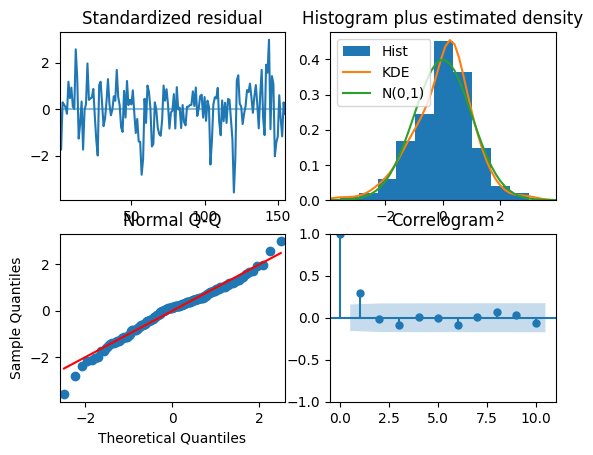

In [8]:
Crude_Series = group(CO_dataset)
best_config, best_score = grid_search_model(Crude_Series.values, lags_list= [1,2,3,4,5, 10])

model_fit, mae, test, predictions  = Ar(Crude_Series.value.values, lags=best_config)

model_fit.plot_diagnostics()
plt.show()

157

In [ ]:
len(Crude_Series)

157

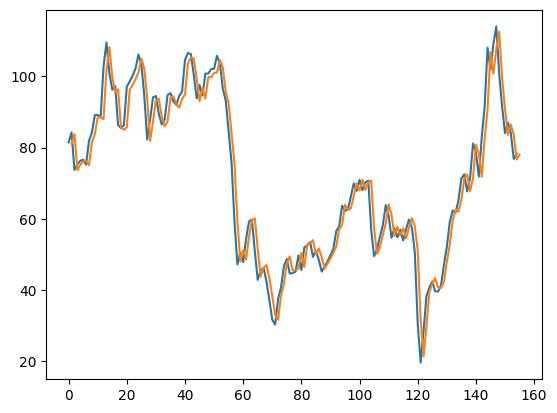

In [53]:
sns.lineplot(Crude_Series.value.values[:-2])
sns.lineplot(model_fit.predict()[:])
plt.show()

In [11]:
error = Crude_Series.value.values[1:] - model_fit.predict()


<Axes: >

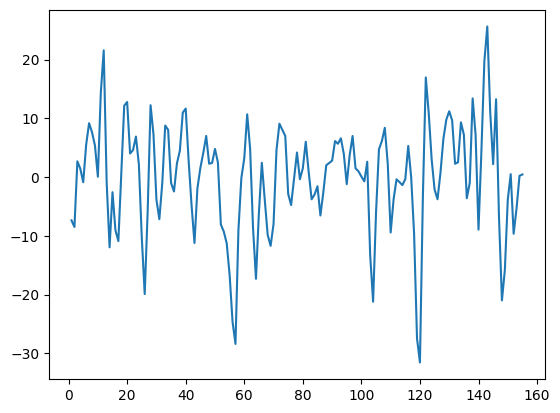

In [12]:
sns.lineplot(error)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Crude_Series.value.values[:-2],model_fit.predict()[1:])
mape = mean_absolute_percentage_error(Crude_Series.value.values[:-2],model_fit.predict()[1:])

print(f'mae: {mae}, mape: {mape}')

mae: 0.6707178716062175, mape: 0.011115280393828409


BASE DE TESTE

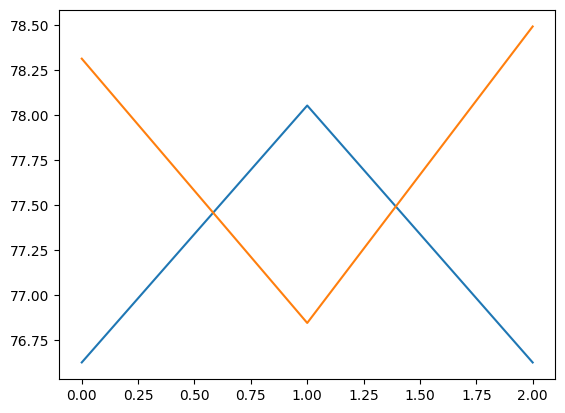

In [28]:
sns.lineplot(predictions)
sns.lineplot(test)
plt.show()

In [ ]:
mae = mean_absolute_error(predictions,test)
mape = mean_absolute_percentage_error(predictions,test)

print(f'mae: {mae}, mape: {mape}')

mae: 1.5877481776921012, mape: 0.020624723111770563


<Axes: >

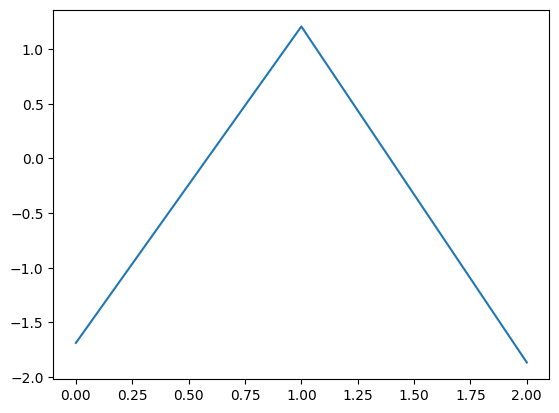

In [55]:
resíduo = predictions - test
sns.lineplot(resíduo)